In [17]:
import numpy as np
from glob import glob
from os.path import join, basename, exists

In [18]:
pdisp1 = "/home/shijie/data/hawaii/DISP4/disp2/"
pdisp2 = "/home/shijie/data/hawaii/DISP4/disp_pycode_mpi/disps/"

In [34]:
diffs = np.zeros([len(glob(join(pdisp1, '*.dat'))),15]) * np.nan
disps = np.zeros([len(glob(join(pdisp1, '*.dat'))),15]) * np.nan

In [35]:
count = 0
for i,fdisp1 in enumerate(glob(join(pdisp1, '*.dat'))):
    disp1 = np.loadtxt(fdisp1, skiprows=2)
    disp1[disp1[:,3]==0,1] = np.nan
    name1 = basename(fdisp1)
    name2 = name1[8:] + '.disp'
    fdisp2 = join(pdisp2, name2)
    if exists(fdisp2):
        disp2 = np.loadtxt(fdisp2)
        # disp2[disp2[:,1] == 0, 1] = np.nan
        diff = disp1[:15,1] - disp2[:,1]
        # diff[np.isnan(diff)] = 0
        diffs[i, :] = diff
        disps[i, :] = disp2[:,1]
        count += 1

(array([  2.,   6.,  18.,  21.,   6.,   0.,   1., 199., 799.,   4.]),
 array([-1.01158897, -0.89067951, -0.76977006, -0.6488606 , -0.52795115,
        -0.40704169, -0.28613223, -0.16522278, -0.04431332,  0.07659614,
         0.19750559]),
 <BarContainer object of 10 artists>)

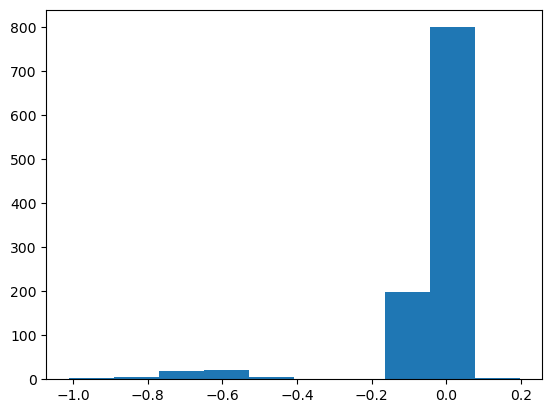

In [38]:
import matplotlib.pyplot as plt
plt.hist(diffs[:,-5])

In [37]:
np.nanmean(np.abs(diffs), axis=0) / np.nanmean(disps, axis=0)

array([0.14561836, 0.1034823 , 0.06825822, 0.0403493 , 0.01903909,
       0.01703822, 0.01595655, 0.01421802, 0.01559436, 0.01784082,
       0.01847899, 0.01635014, 0.01491307, 0.02002824, 0.02321918])

In [5]:
np.nanmean(diffs, axis=0) / np.nanmean(disps, axis=0)

array([0.13538698, 0.11037187, 0.09311644, 0.07323455, 0.04946523,
       0.03752155, 0.02857809, 0.01963557, 0.01908518, 0.03310956,
       0.0266142 , 0.02378787, 0.02307446, 0.02233468, 0.06156108])

In [16]:
np.nanstd(diffs, axis=0)

array([0.30471056, 0.28505871, 0.26633454, 0.24936363, 0.22813885,
       0.20642736, 0.14631481, 0.12535163, 0.11735917, 0.12517311,
       0.12678728, 0.08080386, 0.07080964, 0.08014521, 0.09744015])

In [15]:
np.nansum(~np.isnan(diffs), axis=0)

array([ 475,  711,  897, 1023, 1186, 1305, 1366, 1345, 1288, 1183, 1056,
        913,  771,  638,  465])